<a href="https://colab.research.google.com/github/arnavkundalia/Sports-Feed/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Getting the data in the csv form everytime we run the program

In [ ]:
url = 'https://cricsheet.org/downloads/ipl_csv2.zip'
r = requests.get(url, allow_redirects=True)

open('data.zip', 'wb').write(r.content)


4407948

In [ ]:
file_name = "data.zip"
  
with ZipFile(file_name, 'r') as zip:
    zip.extract('all_matches.csv')

In [ ]:
data = pd.read_csv("all_matches.csv")
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(215110, 22)

In [ ]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing redundant columns from the dataframe

In [ ]:
data.drop(columns=['non_striker','other_wicket_type','other_player_dismissed', 'player_dismissed'],axis =1, inplace=True)

Replacing the duplicate names of stadiums

In [ ]:
old = ['Arun Jaitley Stadium, Delhi','Brabourne Stadium, Mumbai','Dr DY Patil Sports Academy, Mumbai','M.Chinnaswamy Stadium','MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennai','Maharashtra Cricket Association Stadium, Pune','Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali','Rajiv Gandhi International Stadium','Wankhede Stadium, Mumbai']
new= ['Arun Jaitley Stadium','Brabourne Stadium','Dr DY Patil Sports Academy','M Chinnaswamy Stadium','MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk','Maharashtra Cricket Association Stadium','Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium, Mohali','Rajiv Gandhi International Stadium, Uppal','Wankhede Stadium']
data['venue'].replace(old,new,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215110 entries, 0 to 215109
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   match_id      215110 non-null  int64  
 1   season        215110 non-null  object 
 2   start_date    215110 non-null  object 
 3   venue         215110 non-null  object 
 4   innings       215110 non-null  int64  
 5   ball          215110 non-null  float64
 6   batting_team  215110 non-null  object 
 7   bowling_team  215110 non-null  object 
 8   striker       215110 non-null  object 
 9   bowler        215110 non-null  object 
 10  runs_off_bat  215110 non-null  int64  
 11  extras        215110 non-null  int64  
 12  wides         6574 non-null    float64
 13  noballs       882 non-null     float64
 14  byes          561 non-null     float64
 15  legbyes       3385 non-null    float64
 16  penalty       2 non-null       float64
 17  wicket_type   10593 non-null   object 
dtypes: f

In [ ]:
data.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,2.151100e+05,215110.000000,215110.000000,215110.000000,215110.000000,6574.000000,882.000000,561.000000,3385.000000,2.0
mean,8.082135e+05,1.483925,9.543727,1.242546,0.066426,1.204442,1.039683,1.853832,1.301034,5.0
std,3.288380e+05,0.503274,5.683389,1.614802,0.339694,0.785851,0.349495,1.303850,0.841142,0.0
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.012500e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,7.340390e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.136606e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.304075e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


In [ ]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,season,start_date,venue,batting_team,bowling_team,striker,bowler,wicket_type
0,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,NaN
1,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
2,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
3,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN
4,2007/08,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,NaN


In [ ]:
data.isnull().sum()

match_id             0
season               0
start_date           0
venue                0
innings              0
ball                 0
batting_team         0
bowling_team         0
striker              0
bowler               0
runs_off_bat         0
extras               0
wides           208536
noballs         214228
byes            214549
legbyes         211725
penalty         215108
wicket_type     204517
dtype: int64

Checking the correlations between different columns to remove highly correlated data

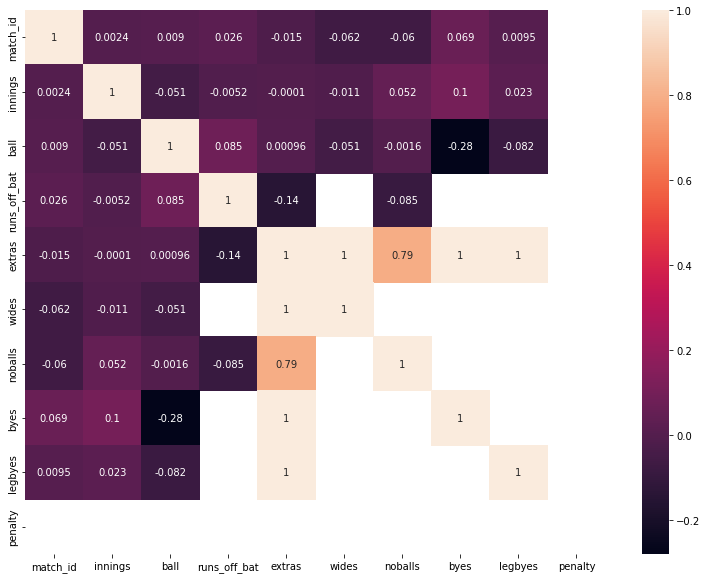

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)

PieChart of the the venue with the most run scored

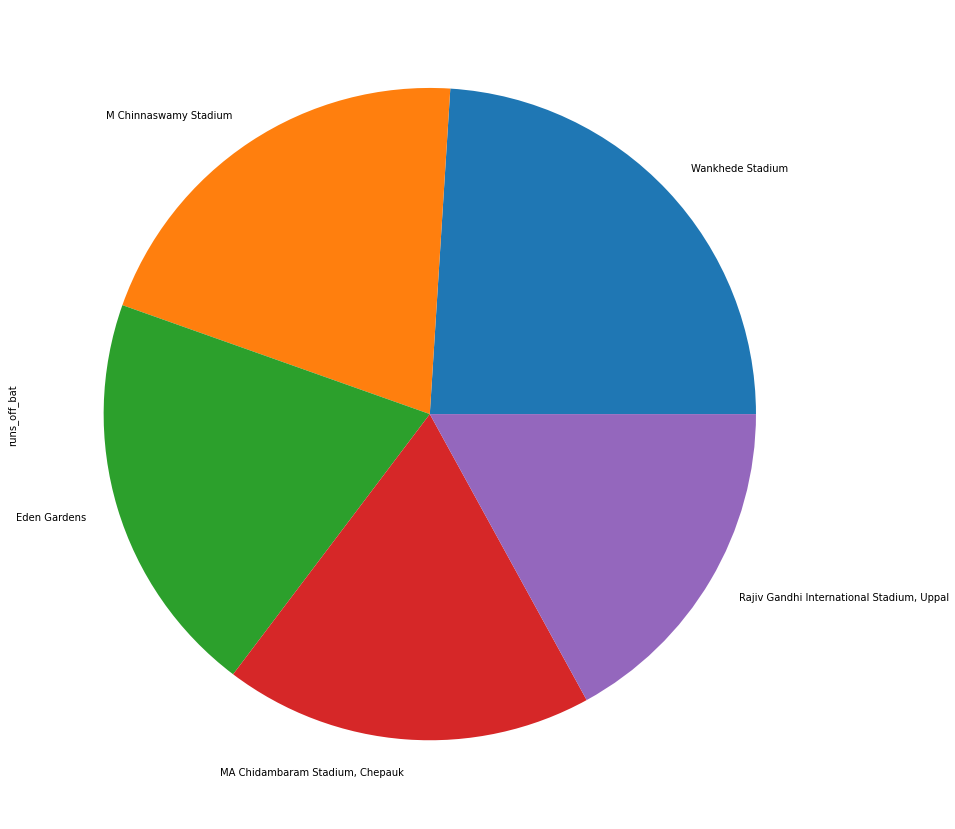

In [ ]:
venue = data.groupby('venue')['runs_off_bat'].count().nlargest(5)
venue.plot(kind="pie", figsize=(20,15))

Plot of Top 20 wicket takers in cricket

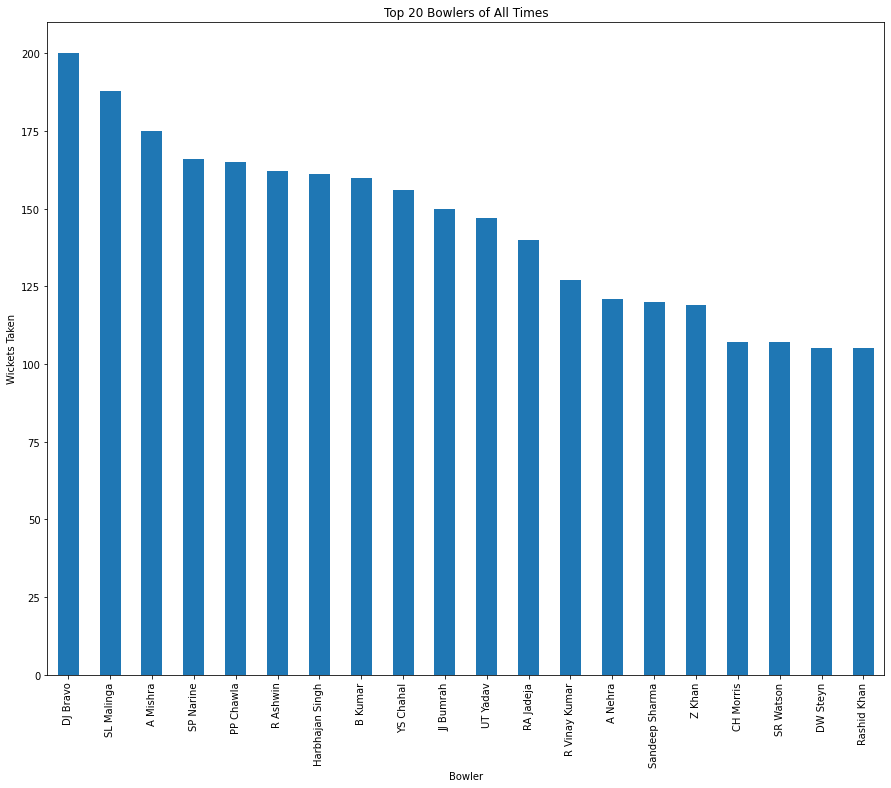

In [ ]:
bowler = data.groupby('bowler')['wicket_type'].count().nlargest(20)
bowler.plot(kind= "bar", ylabel="Wickets Taken", xlabel= "Bowler", figsize = (15,12), title = "Top 20 Bowlers of All Times")

Most run scored during the course of the 14 seasons

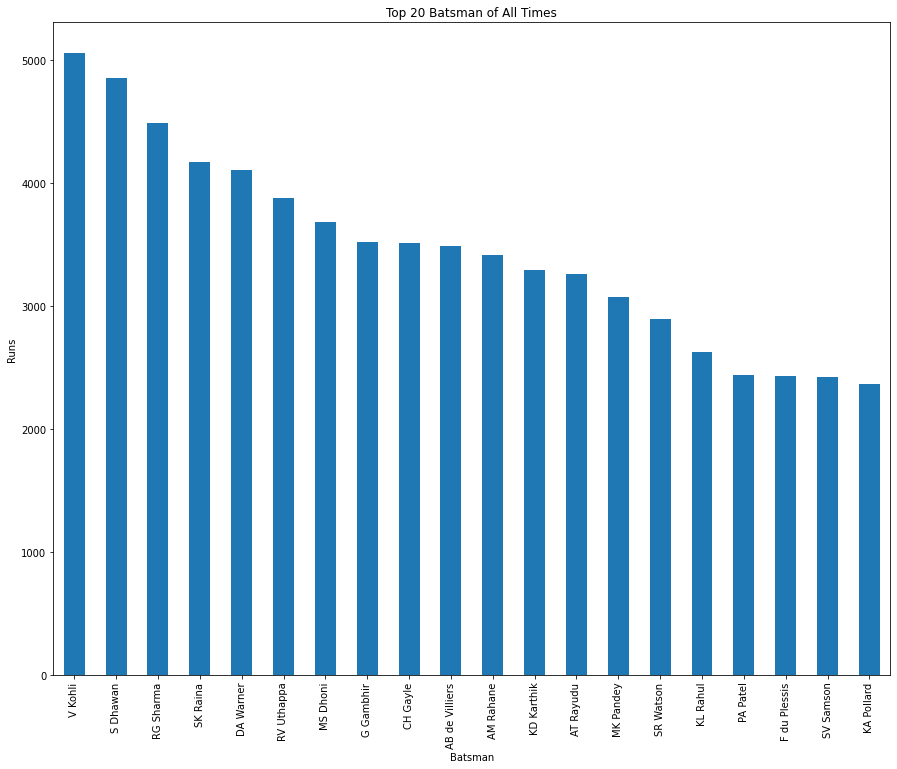

In [ ]:
batsman = data.groupby('striker')['runs_off_bat'].count().nlargest(20)
batsman.plot(kind= "bar", ylabel="Runs", xlabel= "Batsman", figsize = (15,12), title = "Top 20 Batsman of All Times")

Most Runs scored for each of the top 4 teams

In [ ]:
teams = data.groupby(['striker','batting_team'])['runs_off_bat'].sum().nlargest(20)
#teams.plot(kind = "bar", ylabel="Runs", xlabel= "Batsman & Team", figsize = (15,12), title = "Best Players Team Wise")

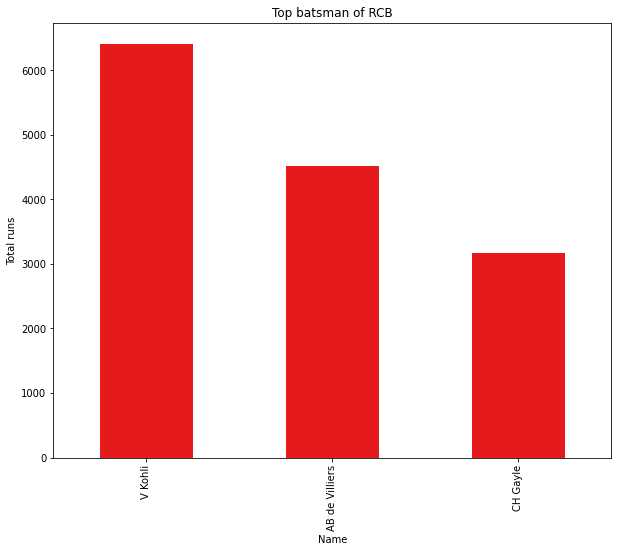

In [ ]:
RCB = teams.loc[:,'Royal Challengers Bangalore']
RCB.plot(kind = "bar", title='Top batsman of RCB', xlabel="Name", ylabel="Total runs", figsize=(10,8), colormap="Set1")

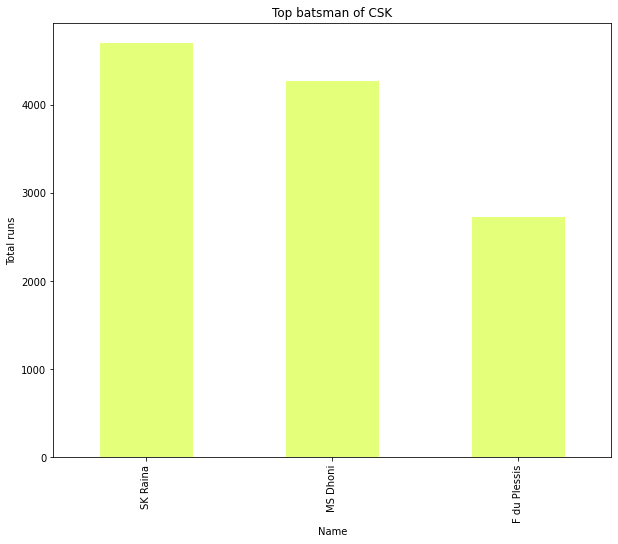

In [ ]:
CSK = teams.loc[:,'Chennai Super Kings']
CSK.plot(kind = "bar", title='Top batsman of CSK', xlabel="Name", ylabel="Total runs", figsize=(10,8), colormap="Wistia")

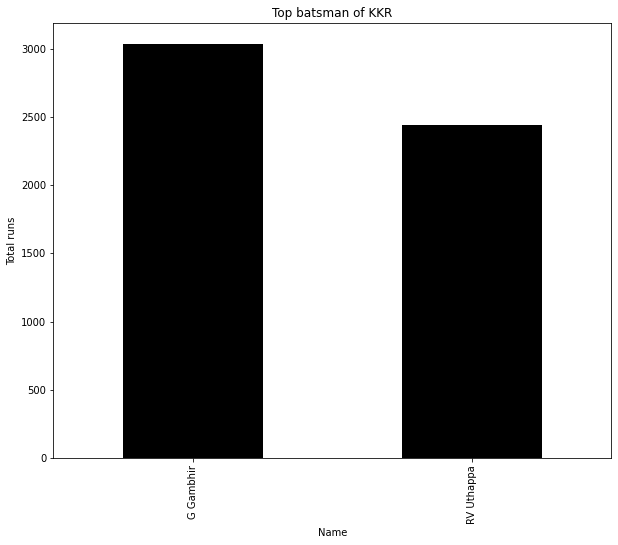

In [ ]:
KKR = teams.loc[:,'Kolkata Knight Riders']
KKR.plot(kind = "bar", title='Top batsman of KKR', xlabel="Name", ylabel="Total runs", figsize=(10,8), colormap="gray")

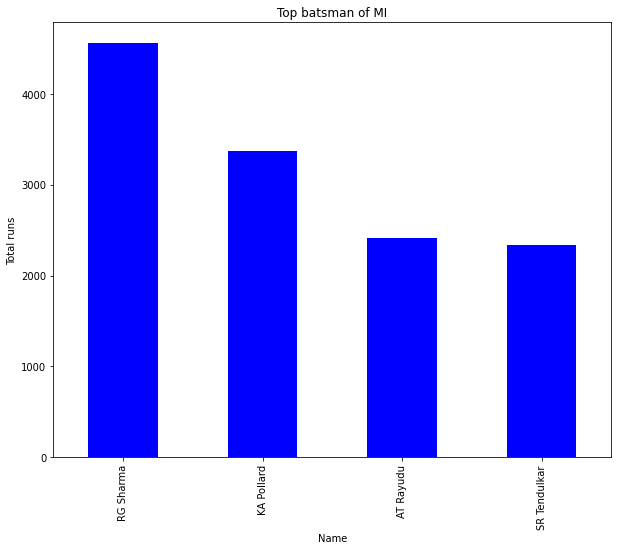

In [ ]:
MI = teams.loc[:,'Mumbai Indians']
MI.plot(kind = "bar", title='Top batsman of MI', xlabel="Name", ylabel="Total runs", figsize=(10,8), colormap="winter")